In [44]:
import tweepy
import json
import spacy
import preprocessor as p

In [27]:
credentials = json.load(open('credentials.json'))
consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret']
access_token = credentials['access_token']
access_token_secret = credentials['access_token_secret']
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def search_twitter(query):
    tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode='extended').items(1000)
    return tweets

In [28]:
insurance_results = search_twitter('insurance')

In [29]:
results_json = []
for result in insurance_results:
    results_json.append(result._json)

In [36]:
# write to file
with open('insurance_tweets.json', 'w') as f:
    json.dump(results_json, f)

In [40]:
# convert to dataframe
import pandas as pd

df = pd.read_json('insurance_tweets.json')

In [45]:
df['clean_text'] = df['full_text'].apply(lambda x: p.clean(x))

In [47]:
from string import punctuation

nlp = spacy.load('en_core_web_sm')
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result # 5

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_model = SentimentIntensityAnalyzer()

df['sentiment'] = df['clean_text'].apply(lambda x: sentiment_model.polarity_scores(x)['compound'])

In [58]:
df['objectivity'] = df['clean_text'].apply(lambda x: sentiment_model.polarity_scores(x)['neu'])
df['subjectivity'] = df['clean_text'].apply(lambda x: sentiment_model.polarity_scores(x)['pos'])
df['number_of_mentioned_entities'] = df['entities'].apply(lambda x: len(x['user_mentions']))
df['keywords'] = df['clean_text'].apply(lambda x: get_hotwords(x))
df['num_keywords'] = df['keywords'].apply(lambda x: len(x))
df['num_noun_chunks'] = df['clean_text'].apply(lambda x: len(list(nlp(x).noun_chunks)))

In [59]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,possibly_sensitive,quoted_status,clean_text,sentiment,objectivity,subjectivity,number_of_mentioned_entities,keywords,num_keywords,num_noun_chunks
0,2022-09-11 04:57:05+00:00,1568825936711122945,1568825936711122944,@TeddiThompsonS1 @YouTube @karen_dippity they ...,False,"[41, 184]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.568825e+18,...,NaN,NaN,"they have to have insurance, right...lolol..is...",0.0000,1.000,0.000,3,"[insurance, right, lolol, dark, corner, muthaf...",8,8
1,2022-09-11 04:57:03+00:00,1568825928498974720,1568825928498974720,RT @blair_fix: Important thread here. US healt...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,: Important thread here. US health insurance c...,0.5023,0.710,0.213,1,"[important, thread, health, insurance, compani...",9,5
2,2022-09-11 04:57:03+00:00,1568825928192782338,1568825928192782336,"RT @depechejoe: Hey, if you’re like me and cur...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,": Hey, if youre like me and currently without ...",0.6901,0.802,0.198,1,"[insurance, income, good, time, new, covid, bo...",8,7
3,2022-09-11 04:57:01+00:00,1568825922358284290,1568825922358284288,Also insurance companies won’t credential ther...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,Also insurance companies wont credential thera...,0.0000,1.000,0.000,0,"[insurance, companies, therapist, area]",4,2
4,2022-09-11 04:56:57+00:00,1568825901865136128,1568825901865136128,RT @David_Slotnick: Just got my son’s hospital...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,: Just got my sons hospital and NICU bill. It ...,0.7177,0.778,0.222,1,"[sons, hospital, nicu, bill, good, insurance]",6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-09-11 04:18:55+00:00,1568816331734269952,1568816331734269952,@dennistlin Are there still insurance policies...,False,"[12, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.568731e+18,...,NaN,NaN,Are there still insurance policies for cases s...,-0.3182,0.700,0.105,1,"[insurance, policies, cases, teams, losses, co...",7,7
996,2022-09-11 04:18:55+00:00,1568816331042205702,1568816331042205696,RT @David_Slotnick: Just got my son’s hospital...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,: Just got my sons hospital and NICU bill. It ...,0.7177,0.778,0.222,1,"[sons, hospital, nicu, bill, good, insurance]",6,8
997,2022-09-11 04:18:54+00:00,1568816326713479170,1568816326713479168,RT @David_Slotnick: Just got my son’s hospital...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,: Just got my sons hospital and NICU bill. It ...,0.7177,0.778,0.222,1,"[sons, hospital, nicu, bill, good, insurance]",6,8
998,2022-09-11 04:18:53+00:00,1568816325325111296,1568816325325111296,RT @David_Slotnick: Just got my son’s hospital...,False,"[0, 140]","{'hashtags': [],

In [63]:
# split df['user'] into multiple columns
df_user = pd.json_normalize(df['user'])

In [65]:
# merge df_user columns with df
df = pd.concat([df, df_user], axis=1)

## Getting the age of a Twitter User

To find the age of the user who comments about insurance, we have to use a multi-task model, that predicts the age from the user's profile photo.

Extract Profile Photo -> Extract Face and Bounding Box -> Predict Age

The Vision API only supports 100 requests a day. Therefore we will only take the most liked tweets. Since this is just an MVP, we reduce the number of rows to 100 temporarily.

In [73]:
# sort by favourite count
df = df.sort_values(by='favorite_count', ascending=False)

# only keep top 100
df = df.head(100)

In [100]:
import requests

client_id = '7a6LuJEWWp2vLyZ1t7WXwiWg'
client_secret = '5a89SdXjQPflywdhOzbNJJBiM3O9cvSavj4Cs1Ya9lSsFqZS'

def get_age(url):
    params = {'url': url}
    quality = requests.get('https://api.everypixel.com/v1/faces', params=params, auth=(client_id, client_secret)).json()
    
    return quality

In [101]:
get_age("https://media-exp1.licdn.com/dms/image/C4D03AQGkhJb4Y2re9A/profile-displayphoto-shrink_200_200/0/1656782604967?e=2147483647&v=beta&t=QwuM1Z1RezaixDrV4IIL00AvUZr8IcfLFb9pQWA4ifU")

{'faces': [{'bbox': [70.79667948843725,
    45.70013444457381,
    130.9501486036786,
    123.66000083422752],
   'score': 0.9998667240142822,
   'age': 21.74080175369454,
   'class': 'Age - Young Adult'}],
 'status': 'ok'}

In [106]:
df['profile_image'] = df['profile_image_url'].apply(lambda x: x.replace('_normal', ''))

In [107]:
df['age'] = df['profile_image'].apply(lambda x: get_age(x))

In [108]:
df.to_csv('insurance_tweets_100.csv', index=False)

In [110]:
for i in df['age']:
    print(i)

{'faces': [{'bbox': [171.0671086653303, 40.37527102334695, 222.46599717375284, 118.78920079642005], 'score': 0.9996312856674194, 'age': 35.608995144531946, 'class': 'Age - Adult'}], 'status': 'ok'}
{'faces': [{'bbox': [148.98461672952354, 79.22403584919972, 234.9660673854952, 212.92229996267056], 'score': 0.9999896287918091, 'age': 32.367901904755854, 'class': 'Age - Adult'}], 'status': 'ok'}
{'faces': [], 'status': 'ok'}
{'faces': [{'bbox': [110.51525882032874, 31.554608191784844, 147.00150835306914, 77.49420380723092], 'score': 0.9993622899055481, 'age': 25.65454548449634, 'class': 'Age - Young Adult'}], 'status': 'ok'}
{'faces': [{'bbox': [107.97126313221352, 70.0158066086653, 220.22753354701797, 231.8404070699029], 'score': 0.9998995065689087, 'age': 23.37673780604382, 'class': 'Age - Young Adult'}], 'status': 'ok'}
{'faces': [{'bbox': [133.87787635932975, 109.42740428675958, 193.07209406038587, 201.68689977513426], 'score': 0.9983048439025879, 'age': 30.569304449672927, 'class': '

In [113]:
df['age_num'] = df['age'].apply(lambda x: x['faces'][0]['age'] if ('faces' in x) and (len(x['faces']) > 0) and ('age' in x['faces'][0]) else 18)
df['age_group'] = df['age'].apply(lambda x: x['faces'][0]['class'] if ('faces' in x) and (len(x['faces']) > 0) and ('age' in x['faces'][0]) else 18)

In [117]:
# K means clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit(df[['age_num', 'sentiment', 'num_noun_chunks', 'num_keywords', 'number_of_mentioned_entities']])

KMeans(n_clusters=3, random_state=0)

Text(0, 0.5, 'Subjectivity')

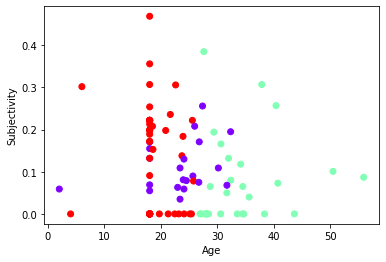

In [118]:
# plot clusters
import matplotlib.pyplot as plt

plt.scatter(df['age_num'], df['subjectivity'], c=km.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Subjectivity')

In [119]:
attributes = df[['age_num', 'sentiment', 'num_noun_chunks', 'num_keywords', 'number_of_mentioned_entities']]
attributes

,age_num,sentiment,num_noun_chunks,num_keywords,number_of_mentioned_entities
949,35.608995,-0.4738,13,9,0
934,32.367902,-0.4257,11,9,0
831,18.000000,-0.8225,7,6,1
706,25.654545,-0.3167,10,11,0
937,23.376738,0.4927,19,26,0
...,...,...,...,...,...
675,18.000000,0.7177,8,6,1
724,25.967404,0.6114,5,13,1
711,20.835641,0.6901,7,8,1
712,27.202222,-0.4939,6,6,2


## Exploration

### PCA

In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array(attributes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [124]:
len(pca.components_)

5

In [126]:
print('Explained Variance Ratio = ', sum(pca.explained_variance_ratio_[: 2]))

Explained Variance Ratio =  0.5865707511500571


In [128]:
import plotly.graph_objs as pgo

data3 = pgo.Data([
    pgo.Bar(
            y=pca.explained_variance_ratio_,
    )
])

/Users/SidharrthNagappan/.virtualenvs/multitask-bert/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  warnings.warn(


In [136]:
# plot data3
import plotly.graph_objects as go

go.Figure(data=data3).show()

Only take the first two principal components.

In [137]:
pca.n_components = 2
X_reduced = pca.fit_transform(X_scaled)
df_X_reduced = pd.DataFrame(X_reduced, index=df.index)

In [159]:
trace = pgo.Scatter(x=df_X_reduced[0],
                    y=df_X_reduced[1],
                    text=df.index,
                    mode='markers',
                    # Size by total population of each neighborhood. 
                    marker=pgo.Marker(size=attributes['num_keywords'],
                                      sizemode='diameter',
                                      sizeref=attributes['num_keywords'].max()/50,
                                      opacity=0.5)
)

data5 = pgo.Data([trace])

In [162]:
layout5 = pgo.Layout(title='Insurance Tweets',
                     xaxis=pgo.XAxis(showgrid=True,
                                     zeroline=False,
                                     showticklabels=False),
                     yaxis=pgo.YAxis(showgrid=True,
                                     zeroline=False,
                                     showticklabels=False),
                     hovermode='closest'
)

/Users/SidharrthNagappan/.virtualenvs/multitask-bert/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/Users/SidharrthNagappan/.virtualenvs/multitask-bert/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:572: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




In [163]:
fig5 = pgo.Figure(data=data5, layout=layout5)

go.Figure(data=fig5).show()

A larger number of people mention more insurance-related keywords in their tweets, while few keep their tweets brief.

In [173]:
# convert X_scaled to dataframe

X_scaled_df = pd.DataFrame(X_scaled, index=df.index)
X_scaled_df.columns = ["pca-one", "pca-two", "pca-three", "pca-four", "pca-five"]

In [176]:
import plotly.express as px

px.scatter_3d(X_scaled_df, x='pca-one', y='pca-two', z='pca-three', width=800)

The 3D graph may not be as informative as there is limited data.

In [178]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'extended_entities',
       'possibly_sensitive', 'quoted_status', 'clean_text', 'sentiment',
       'objectivity', 'subjectivity', 'number_of_mentioned_entities',
       'keywords', 'num_keywords', 'num_noun_chunks', 'id', 'id_str', 'name',
       'screen_name', 'location', 'description', 'url', 'protected',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled',
       'verified', 'statuses_count', 'lan

## Findings

Age - Adult


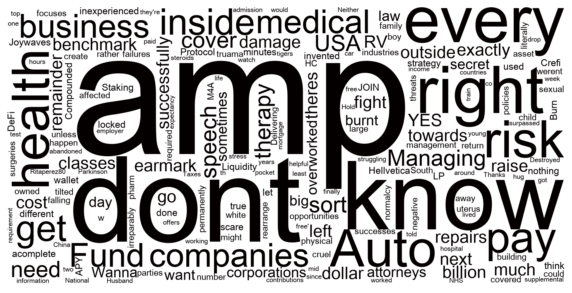

18


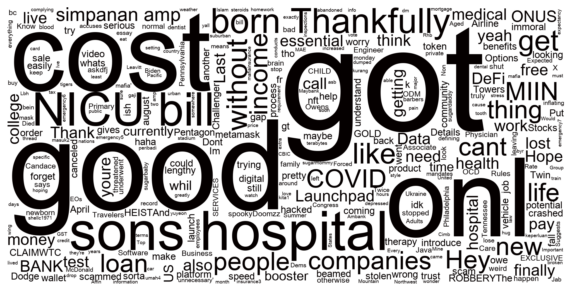

Age - Young Adult


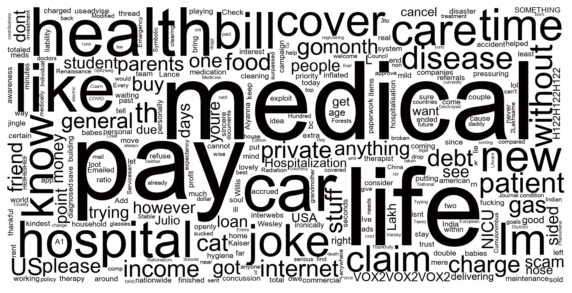

Age - Senior Adult


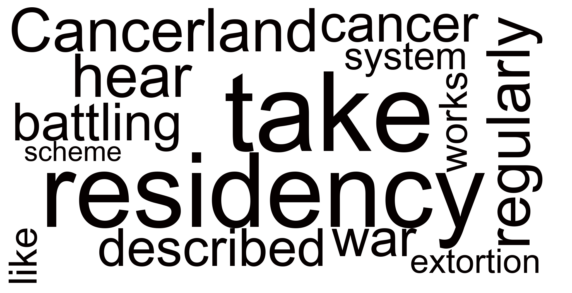

Age - Kid


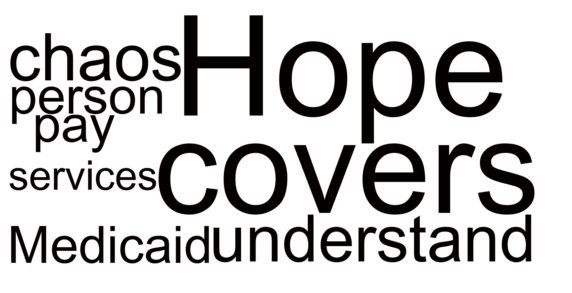

Age - Toddler


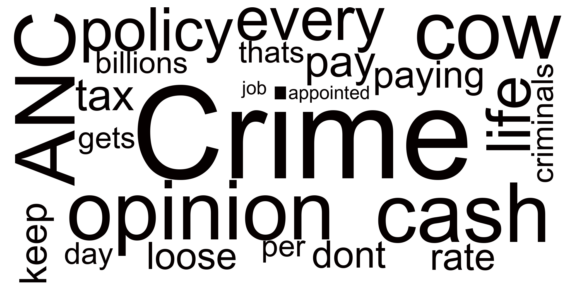

Age - Mature Adult


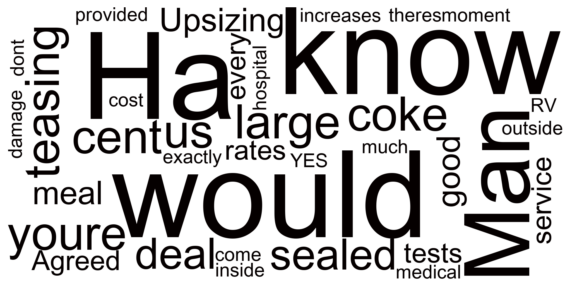

Age - Teenager


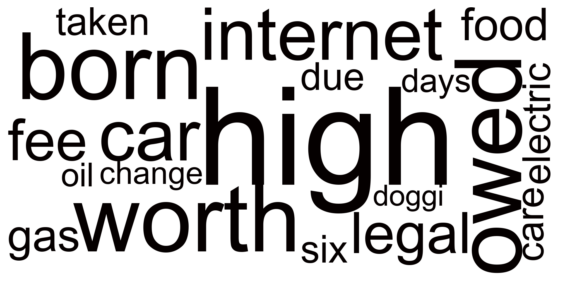

In [193]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

stops = stopwords.words('english')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# for each age group, get the most common keywords
for i in df['age_group'].unique():
    print(i)
    # plot word cloud
    cloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=2000, height=1000, max_words=500, stopwords=stops + ['insurance']).generate(" ".join(df[df['age_group'] == i]['clean_text']))
    cloud.recolor(color_func=black_color_func)
    plt.figure(figsize=(10, 15))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

From common aspects mentioned, most commenters are adults, who talk about general terms like hospitalisation. Senior citizens mainly refer to cancer and illneses related to old age. It may be recommended to promote certain insurance plans to senior citizens who mention issues about medical bills in their tweets.

### Perception of insurance by age group

In [189]:
# average sentiment by age group
sent_by_age = pd.DataFrame(df.groupby('age_group')['sentiment'].mean())
sent_by_age

,sentiment
age_group,
18,0.232466
Age - Adult,-0.032131
Age - Kid,-0.152500
Age - Mature Adult,0.168875
Age - Senior Adult,-0.710500
Age - Teenager,0.470250
Age - Toddler,-0.549900
Age - Young Adult,0.091294


In [192]:
px.bar(sent_by_age, x=sent_by_age.index, y='sentiment', width=600)

Older people generally have worse comments about insurance plans.